In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import cluster
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import numpy as np

In [2]:
hcv = pd.read_csv('datasets/hcvdat0.csv')
hcv.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
hcv["Category"].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [4]:
hcv["Sex"].unique()

array(['m', 'f'], dtype=object)

In [5]:
hcv["Category"].replace({"0=Blood Donor": 0, "0s=suspect Blood Donor": 0, "1=Hepatitis": 1, "2=Fibrosis": 2, "3=Cirrhosis": 3}, inplace=True)

In [6]:
hcv["Sex"].replace({"m": 1, "f": 0}, inplace=True)

In [7]:
del hcv['Unnamed: 0']

In [8]:

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [9]:
clean_dataset(hcv)
hcv

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [10]:
hcv.var()

Category       0.444140
Age           98.631388
Sex            0.236877
ALB           33.198270
ALP          671.901949
ALT          435.269784
AST         1080.231200
BIL          302.988734
CHE            4.800799
CHOL           1.274537
CREA        2570.184928
GGT         2948.751409
PROT          28.610549
dtype: float64

In [11]:
hcv.reset_index()
X = hcv.to_numpy()

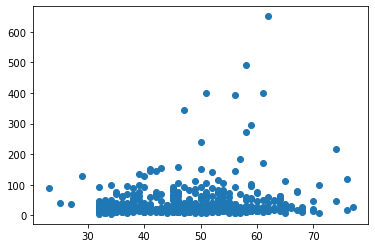

In [12]:

data = pd.DataFrame(X, columns = ["category", "age", "sex", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"])
plt.scatter(data.age, data.GGT)   

In [13]:
Z = linkage(X, "ward")

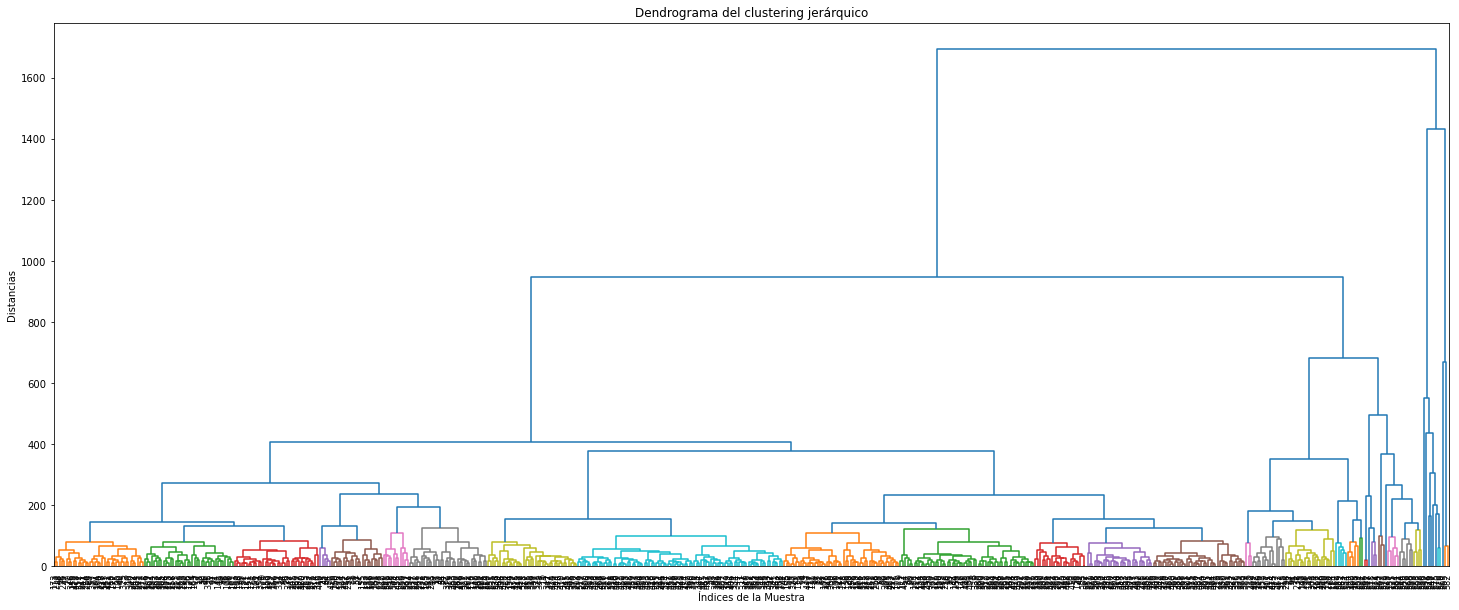

In [14]:
# Dendrograma
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

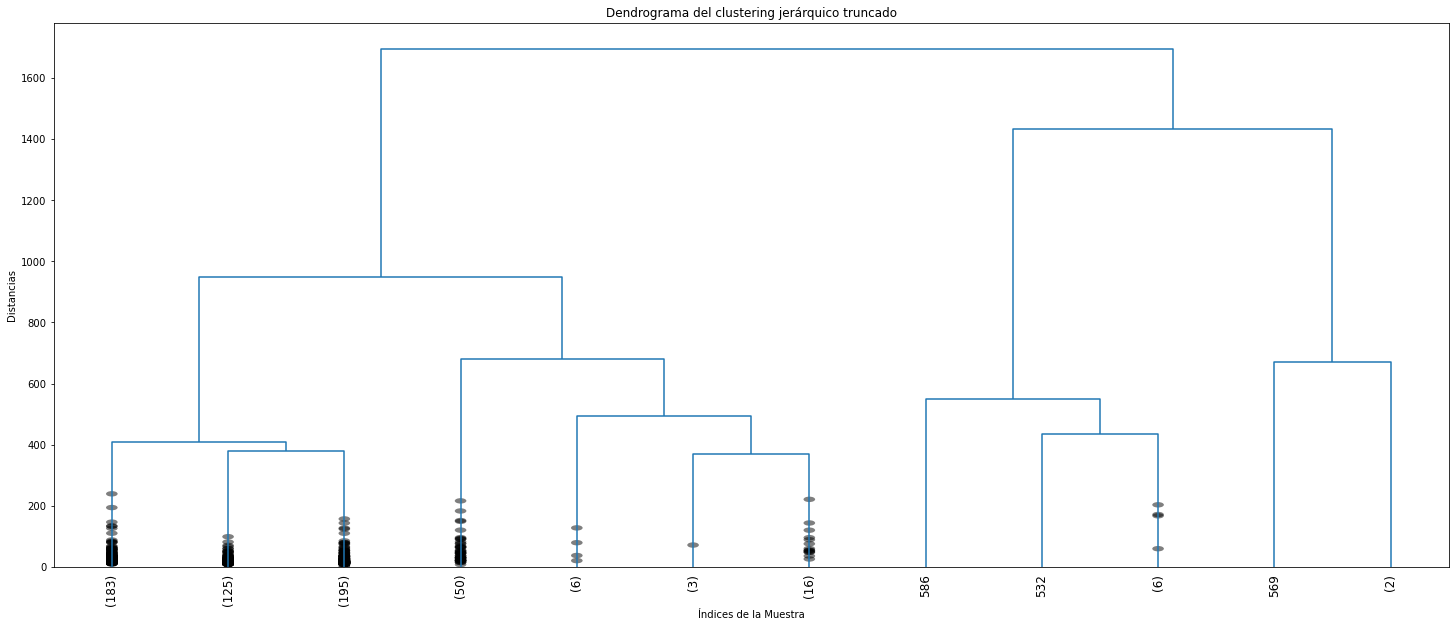

In [15]:
# Dendrograma Truncado
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()

In [16]:
def tuned_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

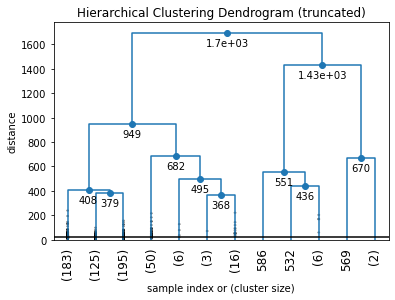

In [17]:
tuned_dendrogram(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20)
plt.show()

In [18]:
from scipy.cluster.hierarchy import fcluster

In [25]:
max_d=150
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([ 1,  6,  2,  1,  7, 10,  5,  1,  7,  7,  1,  6,  7,  6,  5,  6,  7,
        4,  1,  1,  1,  7, 11,  2,  1,  7,  1,  5,  7,  7,  4,  1,  1,  7,
        1, 11,  8,  7,  7,  7,  1,  7,  8,  6,  4,  2,  1,  6,  1,  7,  1,
        1,  7,  8,  4,  1,  1,  2,  7,  6,  7,  7,  1,  1,  2,  2,  8, 11,
        1,  7,  7, 11,  1,  2,  3,  2,  1,  1,  2,  7,  7,  2,  4,  7, 11,
        1,  1,  2,  7,  4,  7, 11,  7,  1, 11,  7,  1,  1,  1,  1,  7,  1,
        1,  6,  1,  7,  7,  7,  1,  1,  2,  7,  1,  8, 11,  7,  4,  7,  7,
        7,  1,  1, 13,  7,  2, 18,  7,  7,  8,  7,  8,  7,  2,  2,  7,  1,
        1,  4,  2, 11,  4,  1,  6, 11,  7, 11,  7,  1,  5,  9,  7,  1,  7,
        1,  5,  2,  1, 11,  1,  7,  1,  1,  7,  1,  7,  4,  1, 11,  6,  6,
        1,  1,  1,  1,  6,  4,  7,  1,  7,  5,  1,  2,  7,  1,  1,  7, 11,
        4, 11,  6,  1,  7,  1, 13,  1,  9,  4,  9,  4,  1,  2,  4,  7,  2,
       14,  1,  7,  7,  7,  7,  7,  1,  7,  1,  4, 11,  7,  7,  1,  9,  9,
        7,  2,  1,  1,  1

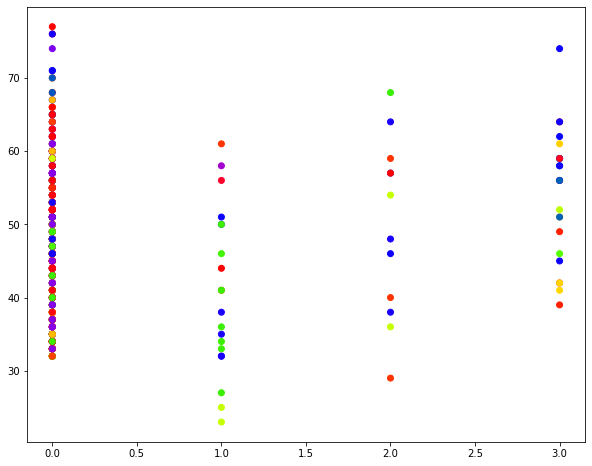

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()